In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def getdata(airline):
    apiKey = "gQvOAvCu725jH4VcgCA300hbQJNwFfz2"
    apiUrl = "https://aeroapi.flightaware.com/aeroapi/"

    operators = airline
    payload = {'max_pages': 5}
    auth_header = {'x-apikey':apiKey}

    response = requests.get(apiUrl + f"operators/{operators}/flights",
    params=payload, headers=auth_header)

    if response.status_code == 200:
        output = response.json()
        return output
    else:
        return("Error executing request")

def getflight(callsign):
    apiKey = "gQvOAvCu725jH4VcgCA300hbQJNwFfz2"
    apiUrl = "https://aeroapi.flightaware.com/aeroapi/"

    flight = str(callsign)
    current_utc_time = datetime.datetime.utcnow()
    utc = current_utc_time.strftime("%Y-%m-%dT%H:%M:%SZ")
    one_day_ago = current_utc_time - datetime.timedelta(days=1)
    utc_1 = one_day_ago.strftime("%Y-%m-%dT%H:%M:%SZ")
    payload = {'max_pages': 1,'start':utc_1,'end':utc}
    auth_header = {'x-apikey':apiKey}

    response = requests.get(apiUrl + f"flights/{flight}",
        params=payload, headers=auth_header)

    if response.status_code == 200:
        output = response.json()
        return output
    else:
        return("Error executing request")
def get_airport_arrivals(airport):
    apiKey = "gQvOAvCu725jH4VcgCA300hbQJNwFfz2"
    apiUrl = "https://aeroapi.flightaware.com/aeroapi/"

    airports = airport
    payload = {'max_pages': 2}
    auth_header = {'x-apikey':apiKey}

    response = requests.get(apiUrl + f"airports/{airports}/flights",
        params=payload, headers=auth_header)

    if response.status_code == 200:
        airport_output = response.json()
    else:
       return("Error executing request")

    airport_arrivals = pd.json_normalize(airport_output['arrivals'])
    airport_arrivals_cleaned=airport_arrivals[["ident_icao","operator","departure_delay","arrival_delay","aircraft_type","route_distance","origin.code_icao","destination.code_icao"]]
    return airport_arrivals_cleaned
def get_historical_flight(callsign):
    apiKey = "gQvOAvCu725jH4VcgCA300hbQJNwFfz2"
    apiUrl = "https://aeroapi.flightaware.com/aeroapi/"

    flight = str(callsign)
    current_utc_time = datetime.datetime.utcnow() - datetime.timedelta(days=1)
    utc = current_utc_time.strftime("%Y-%m-%dT%H:%M:%SZ")
    T_15 = current_utc_time - datetime.timedelta(days=7)
    utc_1 = T_15.strftime("%Y-%m-%dT%H:%M:%SZ")
    payload = {'max_pages': 4,'start':utc_1,'end':utc}
    auth_header = {'x-apikey':apiKey}

    response = requests.get(apiUrl + f"flights/{flight}",
        params=payload, headers=auth_header)

    if response.status_code == 200:
        output = response.json()
        return output
    else:
        return("Error executing request")

2023-11-06 14:57:13.971458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
target_flight = input('Input flight callsign. e.g."UAL1"')
flightdata = getflight(target_flight)
flight = pd.json_normalize(flightdata['flights'])
airline = flight['operator_icao'][0]
departure_delay = flight['departure_delay'][0]
aircraft = flight['aircraft_type'][0]
dist = flight['route_distance'][0]
origin = flight['origin.code_icao'][0]
destination = flight['destination.code_icao'][0]
print(origin)
historical_data = get_historical_flight(target_flight)
print(historical_data)


VHHH
{'flights': [{'ident': 'CPA360', 'ident_icao': 'CPA360', 'ident_iata': 'CX360', 'actual_runway_off': '25L', 'actual_runway_on': None, 'fa_flight_id': 'CPA360-1698990237-schedule-697p', 'operator': 'CPA', 'operator_icao': 'CPA', 'operator_iata': 'CX', 'flight_number': '360', 'registration': 'B-KQU', 'atc_ident': None, 'inbound_fa_flight_id': 'CPA881-1698909966-schedule-99p', 'codeshares': [], 'codeshares_iata': [], 'blocked': False, 'diverted': False, 'cancelled': False, 'position_only': False, 'origin': {'code': 'VHHH', 'code_icao': 'VHHH', 'code_iata': 'HKG', 'code_lid': None, 'timezone': 'Asia/Hong_Kong', 'name': '香港國際機場', 'city': '中国 香港 HK', 'airport_info_url': '/airports/VHHH'}, 'destination': {'code': 'ZSPD', 'code_icao': 'ZSPD', 'code_iata': 'PVG', 'code_lid': None, 'timezone': 'Asia/Shanghai', 'name': "Shanghai Pudong Int'l", 'city': '上海 上海浦东 CN', 'airport_info_url': '/airports/ZSPD'}, 'departure_delay': 660, 'arrival_delay': 180, 'filed_ete': 7440, 'foresight_predictions_a

In [3]:
historical_flight = pd.json_normalize(historical_data['flights'])
historical_airline = historical_flight['operator_icao']
historical_departure_delay = historical_flight['departure_delay']
historical_arrival_delay = historical_flight['arrival_delay']
historical_aircraft = historical_flight['aircraft_type']
historical_dist = historical_flight['route_distance']
historical_origin = historical_flight['origin.code_icao']
historical_destination = historical_flight['destination.code_icao']
flight_requested_historical = pd.DataFrame({'operator':historical_airline,'departure_delay':historical_departure_delay,'aircraft_type':historical_aircraft,'route_distance':historical_dist,'origin.code_icao':historical_origin,'destination.code_icao':historical_destination,'arrival_delay':historical_arrival_delay})
print(flight_requested_historical)

  operator  departure_delay aircraft_type  route_distance origin.code_icao  \
0      CPA              660          B77W             781             VHHH   
1      CPA             -120          B77W             781             VHHH   
2      CPA              -60          B77W             781             VHHH   
3      CPA             2460          B77W             781             VHHH   
4      CPA              840          B77W             781             VHHH   
5      CPA             2520          B77W             781             VHHH   
6      CPA              481          B77W             781             VHHH   

  destination.code_icao  arrival_delay  
0                  ZSPD            180  
1                  ZSPD           1440  
2                  ZSPD           -300  
3                  ZSPD           2400  
4                  ZSPD           1080  
5                  ZSPD           1800  
6                  ZSPD          -9119  


In [4]:
flight_requested = pd.DataFrame({'operator':[airline],'departure_delay':[departure_delay],'aircraft_type':[aircraft],'route_distance':[dist],'origin.code_icao':[origin],'destination.code_icao':[destination],'arrival_delay':[0]})
print(flight_requested)
airline = str(airline)
output = getdata(airline)
scheduled = pd.json_normalize(output['scheduled'])
arrivals = pd.json_normalize(output['arrivals'])
arrivals_cleaned=flight_requested.append(arrivals[["ident_icao","operator","departure_delay","arrival_delay","aircraft_type","route_distance","origin.code_icao","destination.code_icao"]])
destination_airport = get_airport_arrivals(destination)
arrivals_cleaned = arrivals_cleaned.append(destination_airport)
arrivals_cleaned = arrivals_cleaned.append(flight_requested_historical)
numeric_cols = arrivals_cleaned.select_dtypes(include=[int, float])
arrivals_cleaned[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
arrivals_cleaned = arrivals_cleaned.fillna('Unknown')
X = arrivals_cleaned[["operator","departure_delay","aircraft_type","route_distance","origin.code_icao","destination.code_icao"]]
y = arrivals_cleaned['arrival_delay']
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X['operator'])
sequences = tokenizer.texts_to_sequences(X['operator'])
max_sequence_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')
sequences = np.array(sequences)
X['operator'] = sequences
tokenizer.fit_on_texts(X['aircraft_type'])
sequences = tokenizer.texts_to_sequences(X['aircraft_type'])
max_sequence_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')
sequences = np.array(sequences)
X['aircraft_type'] = sequences
tokenizer.fit_on_texts(X['origin.code_icao'])
sequences = tokenizer.texts_to_sequences(X['origin.code_icao'])
max_sequence_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')
sequences = np.array(sequences)
X['origin.code_icao'] = sequences
tokenizer.fit_on_texts(X['destination.code_icao'])
sequences = tokenizer.texts_to_sequences(X['destination.code_icao'])
max_sequence_length = 20
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')
sequences = np.array(sequences)
X['destination.code_icao'] = sequences
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=6))  # Input layer with 6 features
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')  # Use an appropriate loss function for your task
model.fit(X_train, y_train, epochs=1500, batch_size=32, validation_data=(X_test, y_test))
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
y_pred = model.predict(X_test)


  operator  departure_delay aircraft_type  route_distance origin.code_icao  \
0      CPA              420          B77W             781             VHHH   

  destination.code_icao  arrival_delay  
0                  ZSPD              0  


/var/folders/kn/jn9r1zrj4ys26c38g469mwnh0000gn/T/ipykernel_15754/3128556524.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrivals_cleaned=flight_requested.append(arrivals[["ident_icao","operator","departure_delay","arrival_delay","aircraft_type","route_distance","origin.code_icao","destination.code_icao"]])


Epoch 1/1500


/var/folders/kn/jn9r1zrj4ys26c38g469mwnh0000gn/T/ipykernel_15754/3128556524.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrivals_cleaned = arrivals_cleaned.append(destination_airport)
/var/folders/kn/jn9r1zrj4ys26c38g469mwnh0000gn/T/ipykernel_15754/3128556524.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arrivals_cleaned = arrivals_cleaned.append(flight_requested_historical)
/var/folders/kn/jn9r1zrj4ys26c38g469mwnh0000gn/T/ipykernel_15754/3128556524.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['operator'] = sequences
/var/folders/kn/jn9r1zrj4ys26c

3/3 [==============================] - 0s 59ms/step - loss: 23556448.0000 - val_loss: 2347044.0000
Epoch 2/1500
3/3 [==============================] - 0s 11ms/step - loss: 23556074.0000 - val_loss: 2346942.5000
Epoch 3/1500
3/3 [==============================] - 0s 11ms/step - loss: 23555468.0000 - val_loss: 2346857.5000
Epoch 4/1500
3/3 [==============================] - 0s 11ms/step - loss: 23555054.0000 - val_loss: 2346775.2500
Epoch 5/1500
3/3 [==============================] - 0s 11ms/step - loss: 23554830.0000 - val_loss: 2346690.5000
Epoch 6/1500
3/3 [==============================] - 0s 11ms/step - loss: 23554288.0000 - val_loss: 2346618.0000
Epoch 7/1500
3/3 [==============================] - 0s 11ms/step - loss: 23553948.0000 - val_loss: 2346546.0000
Epoch 8/1500
3/3 [==============================] - 0s 14ms/step - loss: 23553548.0000 - val_loss: 2346478.7500
Epoch 9/1500
3/3 [==============================] - 0s 11ms/step - loss: 23553170.0000 - val_loss: 2346409.0000
Epoch

In [5]:
print(arrivals_cleaned)

   operator  departure_delay aircraft_type  route_distance origin.code_icao  \
0       CPA              420          B77W             781             VHHH   
0       CPA             -840          A21N             955             VDPP   
1       CPA             -300          A333             929             VVTS   
2       CPA             -180          A359            4611             YMML   
3       CPA              240          B77W            5990             VHHH   
..      ...              ...           ...             ...              ...   
2       CPA              -60          B77W             781             VHHH   
3       CPA             2460          B77W             781             VHHH   
4       CPA              840          B77W             781             VHHH   
5       CPA             2520          B77W             781             VHHH   
6       CPA              481          B77W             781             VHHH   

   destination.code_icao  arrival_delay ident_icao 

In [6]:
print(y_pred)

[[  573.5704 ]
 [ -539.05505]
 [ 2001.6198 ]
 [ -208.36456]
 [-1522.0582 ]
 [ 1307.0165 ]
 [ 1235.8375 ]
 [ -574.1475 ]
 [ -547.55896]
 [  609.34656]
 [ -196.78223]
 [-1201.6616 ]
 [-1196.6942 ]
 [ 1503.6514 ]
 [  629.3534 ]
 [-1543.8486 ]
 [ 1939.1135 ]
 [ -178.0482 ]
 [ -687.34155]
 [ -203.52963]
 [ -210.40494]
 [ 5689.954  ]
 [ 1044.994  ]]


In [7]:
print(y_test)

4      720
3     -120
39     480
68    -120
9    -1020
44    1080
69    -540
65    -300
46    -600
10     419
22       0
35   -2340
7      840
5     1800
17     120
0        0
71    5207
25    -360
5    -1260
52     -60
28     540
15    3360
11     480
Name: arrival_delay, dtype: int64


In [8]:
print(X_test)

[[ 1.08394406e-01  9.78488025e-02 -1.40758537e-01 -3.52289173e-01
   1.36547016e+00 -5.13795538e-01]
 [-4.33577624e-01 -1.22908889e-01 -6.47489268e-01  2.44630942e+00
  -9.71626155e-01  7.10123914e-02]
 [-4.33577624e-01  9.78488025e-02 -8.16399512e-01 -3.81423390e-01
  -9.71626155e-01  1.11531227e+00]
 [-4.33577624e-01 -1.89136196e-01  3.65972195e-01 -6.89332074e-01
  -9.71626155e-01 -2.21391573e-01]
 [-4.33577624e-01 -4.54045425e-01 -8.16399512e-01 -7.40174139e-01
  -7.57392326e-02 -5.55567533e-01]
 [-4.33577624e-01 -1.25300430e-02 -6.47489268e-01  5.55898630e-02
  -9.71626155e-01  9.06452290e-01]
 [-4.33577624e-01  9.78488025e-02 -3.09668780e-01 -6.38033002e-02
  -9.71626155e-01  4.05188351e-01]
 [-4.33577624e-01 -2.55363503e-01 -3.09668780e-01  7.72977109e-02
  -9.71626155e-01 -5.43035934e-02]
 [-4.33577624e-01 -2.11211965e-01 -3.09668780e-01  2.44630942e+00
   2.16397807e-03 -5.55567533e-01]
 [-4.33577624e-01 -1.25300430e-02 -6.47489268e-01  2.34976663e+00
  -9.71626155e-01  2.7026

In [9]:
flight_requested = pd.DataFrame({'operator':[airline],'departure_delay':[departure_delay],'aircraft_type':[aircraft],'route_distance':[dist],'origin.code_icao':[origin],'destination.code_icao':[destination],'arrival_delay':[0]})
print(flight_requested)


  operator  departure_delay aircraft_type  route_distance origin.code_icao  \
0      CPA              420          B77W             781             VHHH   

  destination.code_icao  arrival_delay  
0                  ZSPD              0  


In [10]:
flight_to_predict = scaler.fit_transform(X)
ETA = model.predict(flight_to_predict)
print("The estimated delay of this flight, in seconds, is:",ETA[0][0])

4/4 [==============================] - 0s 944us/step
The estimated delay of this flight, in seconds, is: -1609.034


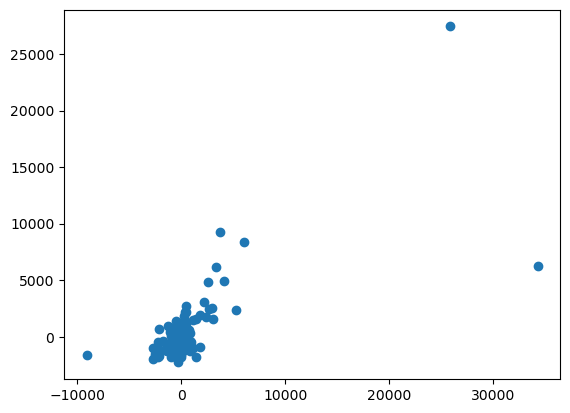

In [11]:
ETA_new = []
for i in range(len(ETA)):
    ETA_new.append(ETA[i][0])
ATA = arrivals_cleaned['arrival_delay']
plt.scatter(ATA,ETA_new)
plt.xlabel='Actual Delay'
plt.ylabel='Estimated Delay'
